<a href="https://colab.research.google.com/github/shawakash/Alpha/blob/main/01_pytorch_workflow_with_MSE_loss_fn_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [124]:
# y = weights * X + bias

# let
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [125]:
len(X), len(y)

(50, 50)

In [126]:
train_split = int(0.8 * len(X))
train_split

40

In [127]:
X_train, y_train = X[:train_split], y[:train_split]
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [128]:
X_test, y_test = X[train_split:], y[train_split:]

In [129]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [130]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

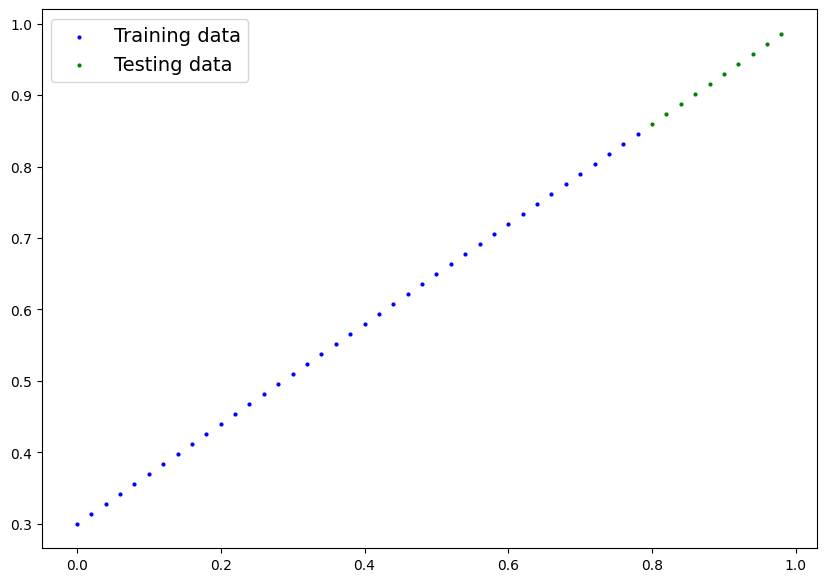

In [131]:
plot_predictions();

In [132]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
     self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

     #feed forward

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [133]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [134]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [135]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [136]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, len(y_preds)

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 10)

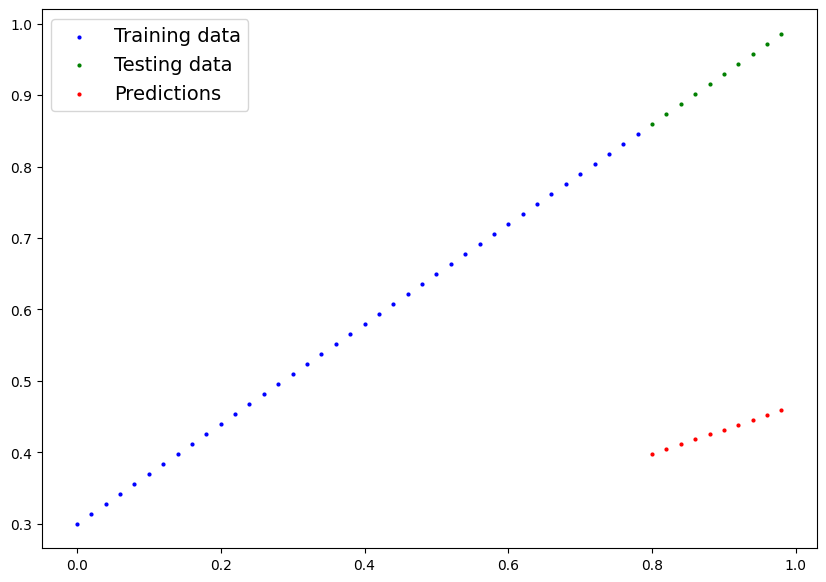

In [137]:
plot_predictions(predictions=y_preds);

In [325]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.01)

In [326]:
epochs = 300

torch.manual_seed(42)

train_loss_value = []
test_loss_value = []
epoch_count = []

for epoch in range(epochs):
  # set the model to the training mode
  model_0.train()

  # 1. forward pass the data to get the current predicted value
  y_preds = model_0(X_train)

  # 2. Calculate the loss function
  loss = loss_fn(y_preds, y_train)
  # print(f"Loss after {epoch} epochs: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. set the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch%10 == 0:
    epoch_count.append(epoch)
    test_loss_value.append(test_loss.detach().numpy())
    train_loss_value.append(loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 7.97223378867784e-07 | Test Loss: 0.0003110591205768287
Epoch: 10 | Loss: 4.1165039874613285e-05 | Test Loss: 2.7873198632732965e-05
Epoch: 20 | Loss: 1.4005304365127813e-05 | Test Loss: 2.592588498373516e-05
Epoch: 30 | Loss: 1.5541678521913127e-06 | Test Loss: 7.915734386187978e-06
Epoch: 40 | Loss: 6.579517730642692e-08 | Test Loss: 1.7874247077998007e-06
Epoch: 50 | Loss: 1.456187259663011e-08 | Test Loss: 6.463245654231287e-07
Epoch: 60 | Loss: 4.646601325930533e-08 | Test Loss: 3.798219836426142e-07
Epoch: 70 | Loss: 7.357829190368648e-08 | Test Loss: 1.7722206280268438e-07
Epoch: 80 | Loss: 3.771556933429565e-08 | Test Loss: 2.2100103080902045e-08
Epoch: 90 | Loss: 1.141081229505403e-09 | Test Loss: 4.649125084910111e-09
Epoch: 100 | Loss: 3.67634278575224e-09 | Test Loss: 7.935907042622148e-09
Epoch: 110 | Loss: 6.308017441725156e-10 | Test Loss: 8.032863263451873e-11
Epoch: 120 | Loss: 5.122308133209685e-10 | Test Loss: 9.596252681376427e-10
Epoch: 130 | Loss:

In [327]:
# y_preds, y_train

In [328]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

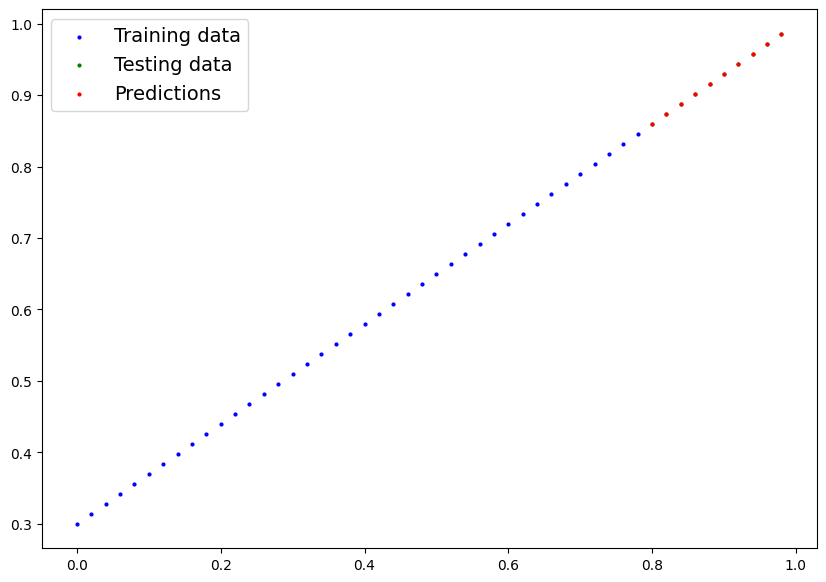

In [329]:
plot_predictions(predictions=y_preds_new);

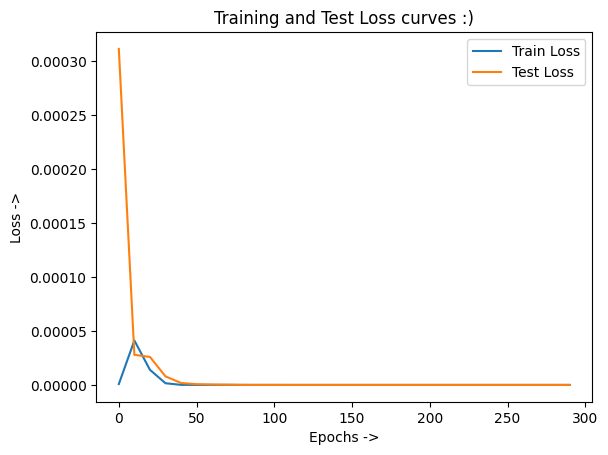

In [330]:
plt.plot(epoch_count, train_loss_value, label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test Loss")
plt.title("Training and Test Loss curves :)")
plt.xlabel("Epochs ->")
plt.ylabel("Loss ->")
plt.legend();